In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
sns.set(rc={'figure.figsize':(9,4)})

In [198]:
df = pd.read_csv('comparison.csv')

In [199]:
df.head()

,Model,Genre,F1-Score,Precision,Genre_Class
0,XGB,0,0.861,0.848,blues
1,XGB,1,0.947,0.940,metal
2,XGB,2,0.819,0.780,reggae
3,XGB,3,0.859,0.874,jazz
4,XGB,4,0.864,0.871,pop


In [200]:
df1 = df[df['Model'] == 'XGB']
df1

,Model,Genre,F1-Score,Precision,Genre_Class
0,XGB,0,0.861,0.848,blues
1,XGB,1,0.947,0.940,metal
2,XGB,2,0.819,0.780,reggae
3,XGB,3,0.859,0.874,jazz
4,XGB,4,0.864,0.871,pop
5,XGB,5,0.902,0.896,disco
6,XGB,6,0.921,0.928,classical
7,XGB,7,0.881,0.904,rock
8,XGB,8,0.867,0.876,hiphop
9,XGB,9,0.821,0.833,country


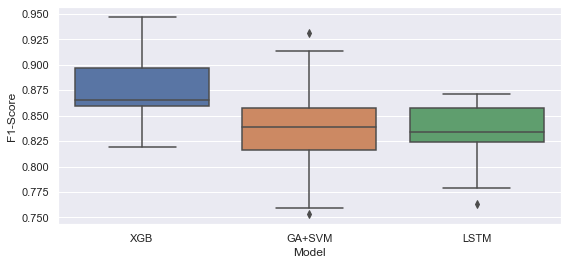

In [201]:
ax1 = sns.boxplot(x="Model", y="F1-Score", data=df)


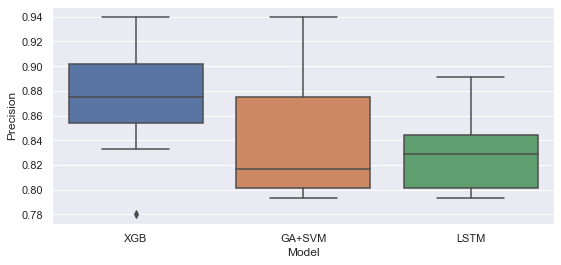

In [202]:
ax2 = sns.boxplot(x="Model", y="Precision", data=df)

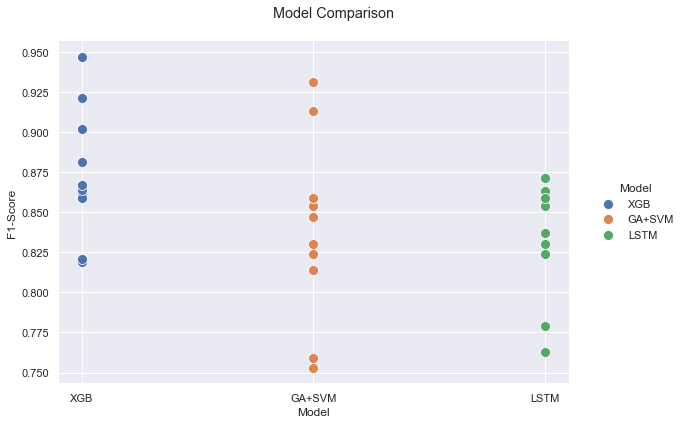

In [203]:

# Form a facetgrid using columns with a hue 
sea = sns.FacetGrid(df, hue = "Model" , height=6, aspect=11.7/8.27 , margin_titles = 'Model Comparison' )
  
sea.map(sns.scatterplot, "Model","F1-Score",s = 100, alpha = 1 )

sea.fig.suptitle('Model Comparison')
sea.fig.subplots_adjust(top=0.9)
sea.add_legend()

Text(0.5, 0.98, 'Model Comparison')

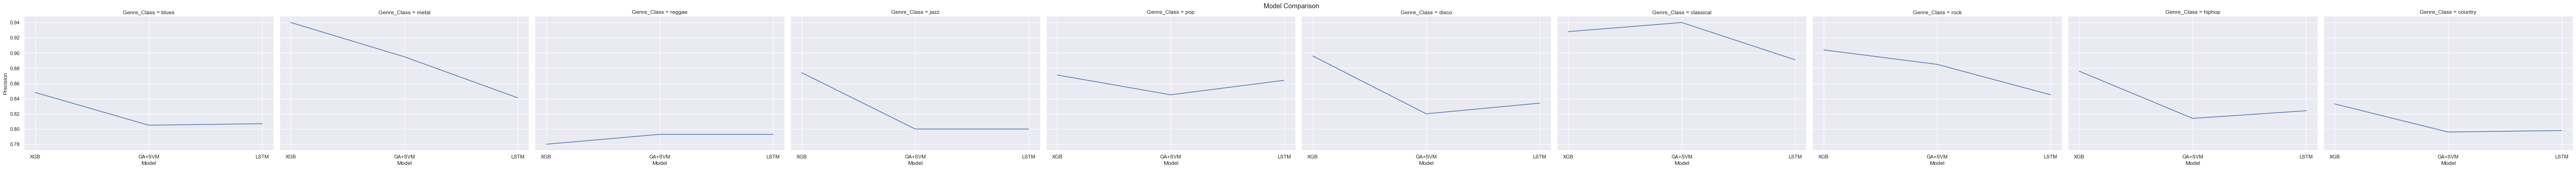

In [234]:
rp = sns.relplot(data=df, x='Model', y='Precision',
                 col='Genre_Class',kind='line', sizes=(10, 100) , ci="sd",aspect = 14/9)

rp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
rp.fig.suptitle('Model Comparison')

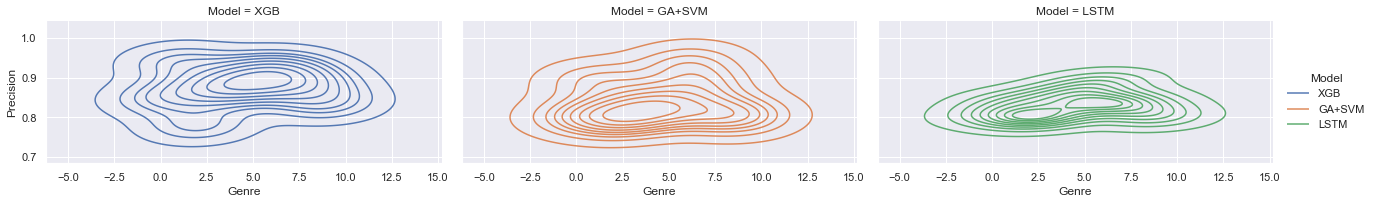

In [227]:
sea = sns.FacetGrid(df, hue = "Model",col = "Model", aspect = 2)
    
# map the above form facetgrid with some attributes   
sea.map(sns.kdeplot, "Genre","Precision", alpha = 0.95 )

  
# adding legend
sea.add_legend()

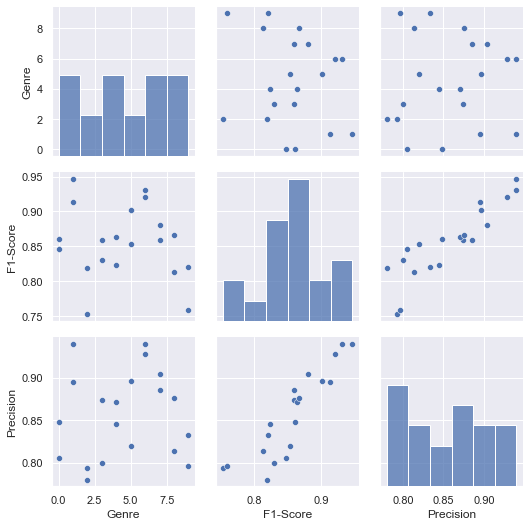

In [82]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

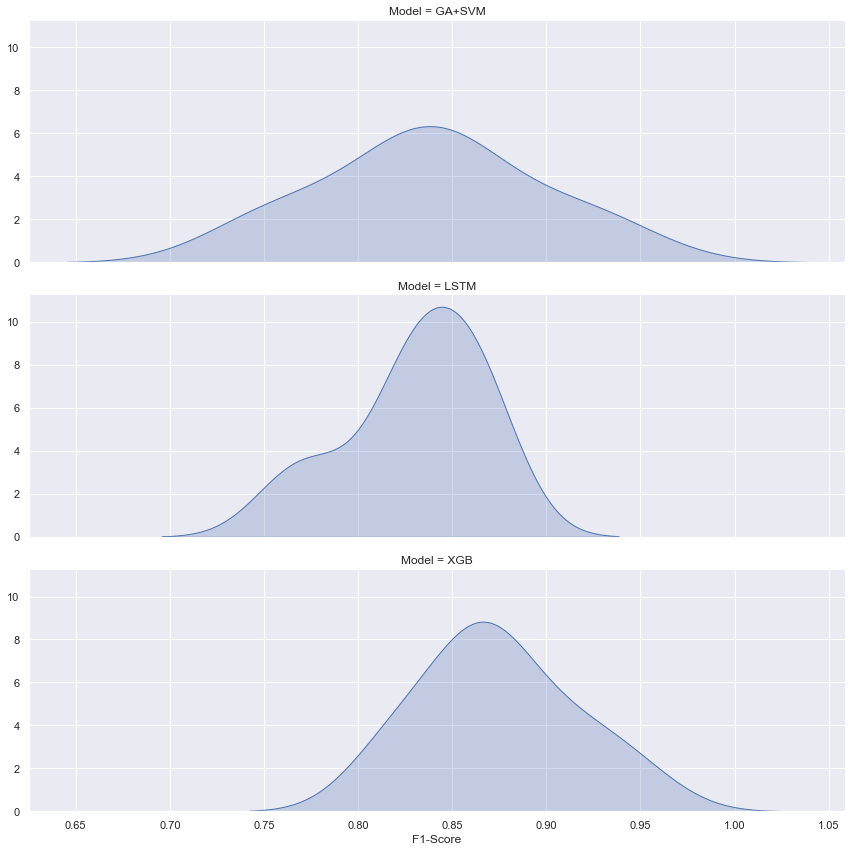

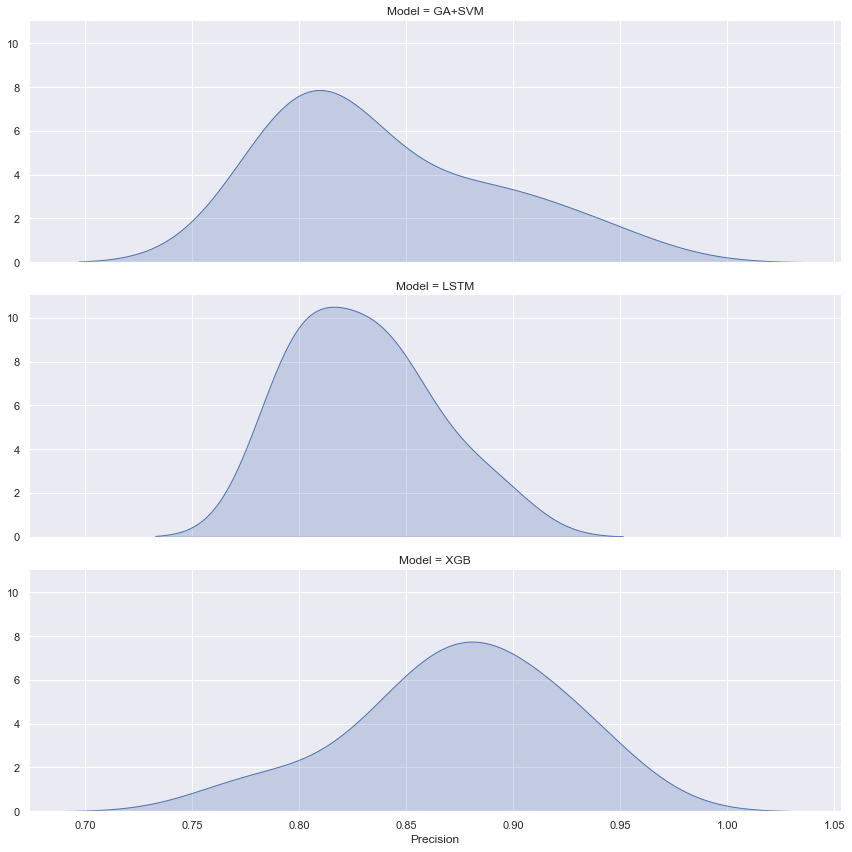

In [233]:
df_kind = df.Model.value_counts().index
sea1 = sns.FacetGrid(df, row = "Model", 
                    row_order = df_kind,
                    height=4, aspect=3 )
  
sea1.map(sns.kdeplot, "F1-Score",shade=True)

sea2 = sns.FacetGrid(df, row = "Model", 
                    row_order = df_kind,
                    height=4, aspect=3)
  
sea2.map(sns.kdeplot, "Precision",shade=True)

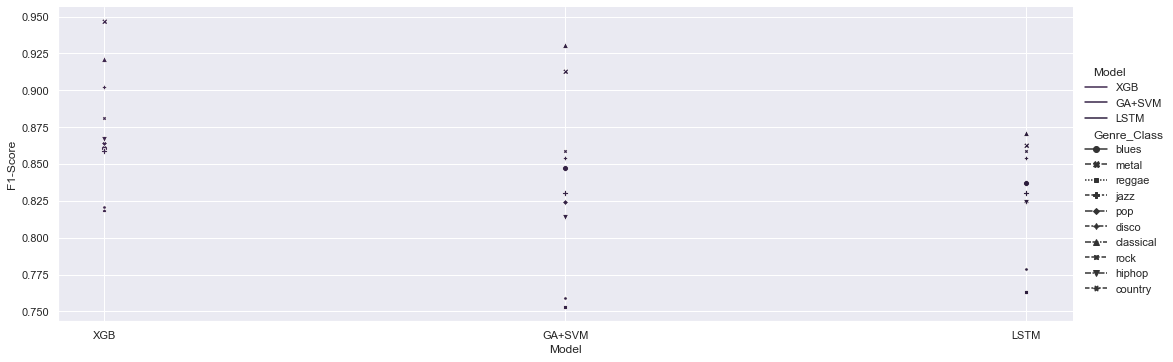

In [256]:
palette = sns.cubehelix_palette(light = 0.2, n_colors=3 )

sns.relplot(x="Model", y="F1-Score", hue="Model", style="Genre_Class",
            dashes=True, markers=True,palette=palette, kind="line", data=df ,aspect = 3 , label = 'big');